In [2]:
#IMPORTING LIBRARIES AND DEPENDENCIES:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')

In [3]:
#IMPORTING THE DATASET:
df=pd.read_csv("laptops.csv")
df.columns

Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'Storage type', 'GPU', 'Screen', 'Touch', 'Final Price'],
      dtype='object')

# Preparing the dataset

In [4]:
#NORMALIZE COLUMN NAMES:
df.columns=df.columns.str.lower().str.replace(" ","_")
df.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

In [5]:
# INSPECTING DATAFRAME:
df.shape

(2160, 12)

In [6]:
#INSPECTING DATAFRAME:
df.head(10)

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
5,MSI Crosshair 17 C12VF-264XES Intel Core i7-12...,New,MSI,Crosshair,Intel Core i7,32,1000,SSD,RTX 4060,17.3,No,1699.00
6,Lenovo Thinkpad E14 Gen 4 AMD Ryzen 5 5625U/8G...,New,Lenovo,ThinkPad,AMD Ryzen 5,8,256,SSD,NaN,14.0,No,909.00
7,ASUS VivoBook 15 F515JA-EJ2882W Intel Core i7-...,New,Asus,VivoBook,Intel Core i7,8,512,SSD,NaN,15.6,No,809.01
8,Medion Akoya E15415 Intel Core i5-10210U/8GB/2...,New,Medion,Akoya,Intel Core i5,8,256,SSD,NaN,15.6,No,519.00
9,HP Victus 16-d1038ns Intel Core i7-12700H/16GB...,New,HP,Victus,Intel Core i7,16,512,SSD,RTX 3050,16.1,No,1149.00


In [7]:
# SELECTING THE REVELANT COLUMNS:
select_cols=['ram', 'storage','screen','final_price']
df=df[select_cols]
df

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


# EXPLORATORY DATA ANALYSIS:

In [8]:
# DATAFRAME INFORMATION:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ram          2160 non-null   int64  
 1   storage      2160 non-null   int64  
 2   screen       2156 non-null   float64
 3   final_price  2160 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 67.6 KB


- Answer for Questions 1: "screen"

# NULL VALUE  CHECKER:

In [9]:
# INSPECTING NULL VALUES
incomplete=df.isna().mean()*100
print(incomplete[incomplete>0])

screen    0.185185
dtype: float64


In [10]:
# INSPECTING NULL VALUES
df.isna().any()

ram            False
storage        False
screen          True
final_price    False
dtype: bool

# DUPLICATES:

In [11]:
# INSPECTING DUPLICATES
df.duplicated().value_counts()

False    1862
True      298
dtype: int64

# DESCRIPTIVE ANALYSIS:

In [12]:
#INITIALIZING DESCRIPTIVE ANALYSIS:
df.describe(percentiles=[0,.25,.50,.75,.90,.95,.99,.1]).T

,count,mean,std,min,0%,10%,25%,50%,75%,90%,95%,99%,max
ram,2160.0,15.413889,9.867815,4.00,4.00,8.00,8.0000,16.000,16.00,32.000,32.0000,64.0000,128.00
storage,2160.0,596.294444,361.220506,0.00,0.00,256.00,256.0000,512.000,1000.00,1000.000,1000.0000,2000.0000,4000.00
screen,2156.0,15.168112,1.203329,10.10,10.10,13.40,14.0000,15.600,15.60,16.100,17.3000,17.3000,18.00
final_price,2160.0,1312.638509,911.475417,201.05,201.05,449.99,661.0825,1031.945,1708.97,2518.038,3199.0005,4499.4059,7150.47


In [13]:
# INSPECTING THE MEDIAN
np.median(df['ram'])

16.0

- Answer for Question 2: "'ram'" = 16.0

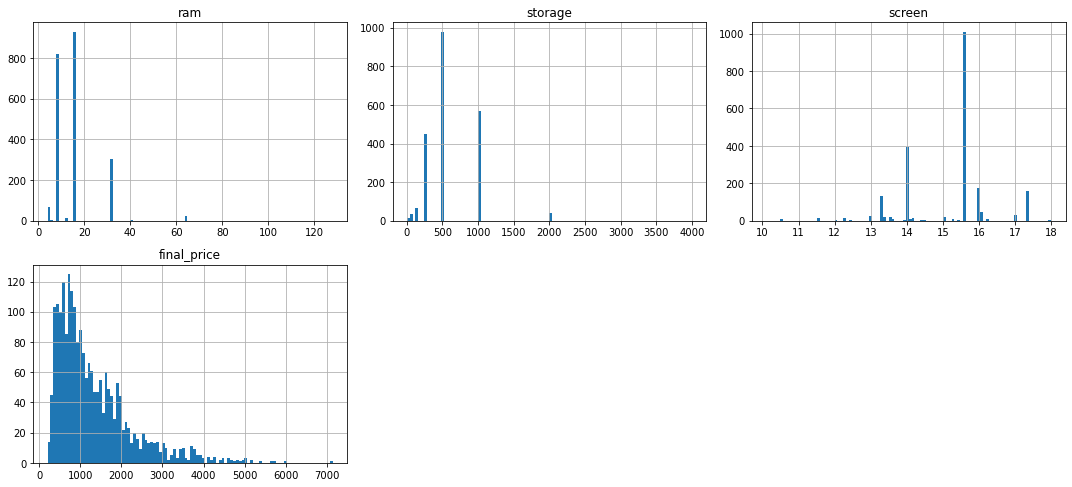

In [14]:
# INSPECTING HISTOGRAM:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()
df.hist(bins=100, ax=ax, layout=(3, 3),column=['ram', 'storage','screen','final_price'])
plt.tight_layout()
plt.show()

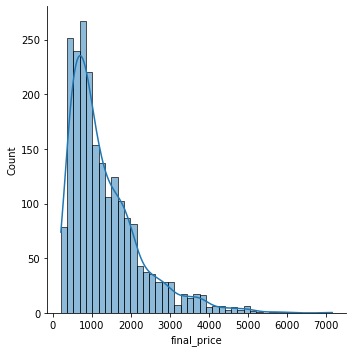

In [15]:
#INSPECTING THE FINAL PRICE
sns.displot(df.final_price,kde=True)
plt.show()

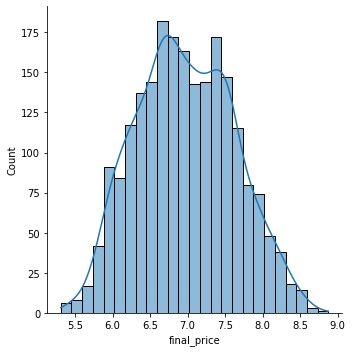

In [16]:
# INSPECTING FINAL PRICE:
sns.displot(np.log1p(df.final_price),kde=True)
plt.show()


# SIMPLE LINEAR REGRESSION:

In [17]:
# FUNCTION FOR LINEAR REGRESSION:
def train_linear_regression(X, y):
    ones=np.ones(X.shape[0])
    X=np.column_stack([ones, X])
    
    XTX=X.T.dot(X)
    XTX_inv=np.linalg.inv(XTX)
    w=XTX_inv.dot(X.T).dot(y)
    return w[0],w[1:]

# DATASET PREPARATION:

In [21]:
# SHUFFLING DATASET:
idx=np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)


In [20]:
# SPLITTING THE DATASET:
n=len(df)
n_val=int(n*0.20)
n_test=int(n*0.20)
n_train=n-(n_val+n_test)

In [24]:
# PREPARING THE DATASET:
df_train=df.iloc[idx[:n_train]].copy()
df_val=df.iloc[idx[n_train:n_train+n_val]].copy()
df_test=df.iloc[idx[n_train+n_val:]].copy()

df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

In [25]:
#PREPARING THE LABELS:
y_train_origin=df_train.final_price.values
y_test_origin=df_test.final_price.values
y_val_origin=df_val.final_price.values

y_train=np.log1p(y_train_origin)
y_test=np.log1p(y_test_origin)
y_val=np.log1p(y_val_origin)

In [26]:
# DELETING DATASET:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [27]:
#PREPARING THE DATASET:
check=['ram','storage','screen']
#DEFINING FUNCTION:
def prepare_X(df,fillna_value):
    df_num=df[check]
    df_num=df_num.fillna(fillna_value)
    X=df_num.values
    return X



In [28]:
# FUNCTION FOR RMSE VALUES:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)
     

In [29]:
#FILLING MISSING VALUES:
mean = df_train.screen.mean()
X_mean_train = prepare_X(df_train, fillna_value=mean)
w_0_mean, w_mean = train_linear_regression(X_mean_train, y_train)
     

In [30]:
#FILLING MISSING VALUES:
X_mean_val = prepare_X(df_val, fillna_value=mean)
y_mean_pred_val = w_0_mean + X_mean_val.dot(w_mean)

In [31]:
#GETTING RMSE SCORE:
np.round(rmse(y_val, y_mean_pred_val),2)

0.43

In [32]:
#PREPARIN DATASET:
X_null_train = prepare_X(df_train, fillna_value=0)
w_0_null, w_null = train_linear_regression(X_null_train, y_train)

In [33]:
#PREPARING DATASET:
X_null_val = prepare_X(df_val, fillna_value=0)
y_null_pred_val = w_0_null + X_null_val.dot(w_null)

In [34]:
# GETTING RMSE SCORE:
np.round(rmse(y_val, y_null_pred_val),2)

0.43

- Answer for Question 3: Both are equally good.

# REGULARIZATION:

In [36]:
# FUNCTION FOR TRAINING LINEAR REGRESSION:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [254]:
#INSPECTING THE RESULTS:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_null_train, y_train, r=r)
    y_null_reg_val = w_0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val),3)
    print(r, w_0, rmse_val)

0 6.727163706112961 0.429
0.01 6.721004333260485 0.429
0.1 6.66607550382847 0.429
1 6.162616499461258 0.431
5 4.6160861764976975 0.463
10 3.5167547207936636 0.508
100 0.6849263362659601 0.674


- Answer for Question 4 is 0.

# SEED CHECKING

In [255]:
#CHECKING THE RMSE SCORES:
rmse_list = []

for r in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    idx=np.arange(n)
    np.random.seed(r)
    np.random.shuffle(idx)

    df_train=df.iloc[idx[:n_train]].copy()
    df_val=df.iloc[idx[n_train:n_train+n_val]].copy()
    df_test=df.iloc[idx[n_train+n_val:]].copy()

    df_train=df_train.reset_index(drop=True)
    df_val=df_val.reset_index(drop=True)
    df_test=df_test.reset_index(drop=True)
    
    y_train_origin=df_train.final_price.values
    y_test_origin=df_test.final_price.values
    y_val_origin=df_val.final_price.values

    y_train=np.log1p(y_train_origin)
    y_test=np.log1p(y_test_origin)
    y_val=np.log1p(y_val_origin)
    
    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']
    
    X_null_train = prepare_X(df_train, fillna_value=0)
    w_0, w = train_linear_regression(X_null_train, y_train)
    
    X_null_val = prepare_X(df_val, fillna_value=0)
    y_null_reg_val = w_0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val),3)
    
    rmse_list.append(rmse_val)
    
    print(r, w_0, rmse_val)
     

0 6.572550232271143 0.43
1 6.750720484984004 0.452
2 6.63212747804565 0.446
3 6.651036507373699 0.446
4 6.6857004243427385 0.42
5 6.655019237483842 0.425
6 6.896746475861185 0.449
7 6.554102037367294 0.431
8 6.6089075278241065 0.443
9 6.7228794219504495 0.408


In [256]:
#INSPECTING THE RMSE LIST:
rmse_list

[0.43, 0.452, 0.446, 0.446, 0.42, 0.425, 0.449, 0.431, 0.443, 0.408]

In [257]:
#INSPECTING THE RMSE:
np.round(np.std(rmse_list),3)

0.014

- Answer for Question 5 is 0.014

# SEED AND REGULARIZATION:

In [264]:
    r=9
    idx = np.arange(n)
    np.random.seed(r)
    np.random.shuffle(idx)


    df_train=df.iloc[idx[:n_train]].copy()
    df_val=df.iloc[idx[n_train:n_train+n_val]].copy()
    df_test=df.iloc[idx[n_train+n_val:]].copy()
    
    frames = [df_train, df_val]
    df_train_val = pd.concat(frames)

    df_train=df_train.reset_index(drop=True)
    df_val=df_val.reset_index(drop=True)
    df_test=df_test.reset_index(drop=True)


    y_train_origin=df_train.final_price.values
    y_test_origin=df_test.final_price.values
    y_val_origin=df_val.final_price.values

    y_train=np.log1p(y_train_origin)
    y_test=np.log1p(y_test_origin)
    
    
    del df_train['final_price']
    del df_test['final_price']

In [265]:
#INSPECTING RMSE:
X_null_train_val = prepare_X(df_train_val, fillna_value=0)
w_0_train_val, w_train_val = train_linear_regression_reg(X_null_train_val, y_train, r=0.001)

X_null_test = prepare_X(df_test, fillna_value=0)
y_null_pred_test = w_0_train_val + X_null_test.dot(w_train_val)

np.round(rmse(y_test, y_null_pred_test),2)
     

ValueError: shapes (4,1728) and (1296,) not aligned: 1728 (dim 1) != 1296 (dim 0)